<div align="center">

# STOCK PRICE PREDICTION
<h3>Predicting Future Stock Prices Using Historical Data</h3>

</div>

---

<div align="center">
<h2>📌 Step 1: Project Definition & Objective</h2>
</div>

**Goal:** Predict future stock prices based on historical stock data.

**Objectives:**
- Understand stock price trends and patterns.
- Build predictive models using historical features like Open, High, Low, Close, Volume.
- Evaluate model performance and provide actionable insights.

**Key Deliverables:**
- Cleaned dataset ready for modeling.
- Exploratory Data Analysis (EDA) report.
- Predictive model(s) with evaluation metrics.
- Visualizations of predictions vs actual prices.
- Summary of insights and limitations.


In [7]:
pip install --user yfinance --upgrade


Note: you may need to restart the kernel to use updated packages.


In [33]:
# Step 1: Initial setup for Stock Price Prediction Project

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Set plot style
sns.set(style='whitegrid')

# Print a message to confirm setup
print("Environment ready for Stock Price Prediction Project")


Environment ready for Stock Price Prediction Project


<div align="center">
<h2>📌 Step 2: Data Collection</h2>
</div>

**What we are going to do:**  
- Select the stock(s) for prediction (e.g., Apple, Tesla, S&P 500 index).  
- Decide the time frame (e.g., last 5–10 years).  
- Fetch historical daily data using `yfinance` (Open, High, Low, Close, Volume, Adj Close).  
- Save the dataset locally for reproducibility.  
- Ensure data frequency and sufficient data points for modeling.


In [34]:
# Define the stock symbol and time period
stock_symbol = "AAPL"
start_date = "2015-01-01"
end_date = "2025-01-01"

# Fetch historical data using yfinance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date, auto_adjust=True)

# Check if columns are multi-level and flatten them
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = stock_data.columns.get_level_values(0)  # Take first level only

# Reset index to ensure Date is proper
stock_data.index.name = 'Date'

# Save clean CSV
stock_data.to_csv(f"{stock_symbol}_historical_data_clean.csv")

stock_data.columns.name = None
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

                Close       High        Low       Open     Volume
Date                                                             
2015-01-02  24.261044  24.729267  23.821668  24.718171  212818400
2015-01-05  23.577574  24.110150  23.391173  24.030263  257142000
2015-01-06  23.579798  23.839428  23.218089  23.641931  263188400
2015-01-07  23.910440  24.010298  23.677438  23.788391  160423600
2015-01-08  24.829124  24.886821  24.121242  24.238854  237458000


---

<div align="center">

<h2>📌 Step 3: Data Preprocessing</h2>

</div>

**What we are going to do:**  
- Handle missing values in the dataset (drop or impute).  
- Perform feature engineering: calculate moving averages (MA), exponential moving averages (EMA), daily returns, volatility, and lag features for time-series prediction.  
- Scale/normalize data using MinMaxScaler or StandardScaler for models like LSTM.  
- Split the dataset chronologically into training and testing sets for time-series modeling.  
- Ensure no shuffling and keep scaling consistent between train and test sets.


In [38]:
# Step 3: Data Preprocessing

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the clean historical stock data
df = pd.read_csv("AAPL_historical_data_clean.csv", index_col=0, parse_dates=True)

# 1. Handle missing values (if any)
df = df.dropna()  # drop rows with missing values
# Alternative: df.fillna(method='ffill', inplace=True)

# 2. Feature Engineering
# Moving Average (MA)
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Exponential Moving Average (EMA)
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()
df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

# Daily Returns
df['Daily_Return'] = df['Close'].pct_change()

# Volatility (rolling std)
df['Volatility_10'] = df['Close'].rolling(window=10).std()
df['Volatility_50'] = df['Close'].rolling(window=50).std()

# Lag features (previous day prices)
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)

# Drop initial rows with NaN from rolling calculations
df.dropna(inplace=True)

# 3. Scaling/Normalization (example using MinMaxScaler)
scaler = MinMaxScaler()
scaled_columns = ['Close','Open','High','Low','Volume','MA_10','MA_50','EMA_10','EMA_50','Daily_Return','Volatility_10','Volatility_50','Close_Lag1','Close_Lag2']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# 4. Train-Test Split (chronological)
train_size = int(len(df)*0.8)
train_df = df[:train_size]
test_df = df[train_size:]

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)
print(df.head())

df.to_csv("AAPL_preprocessed.csv")
print('Done')


Training set shape: (1973, 14)
Testing set shape: (494, 14)
               Close      High       Low      Open    Volume     MA_10  \
Date                                                                     
2015-03-16  0.030371  0.028999  0.029403  0.029789  0.192238  0.029652   
2015-03-17  0.032332  0.031215  0.032024  0.031689  0.289099  0.029429   
2015-03-18  0.033674  0.032935  0.032703  0.032725  0.380199  0.029422   
2015-03-19  0.032764  0.033019  0.033674  0.034372  0.255764  0.029527   
2015-03-20  0.031263  0.032225  0.031563  0.033901  0.402093  0.029460   

               MA_50    EMA_10    EMA_50  Daily_Return  Volatility_10  \
Date                                                                    
2015-03-16  0.022181  0.028779  0.022230      0.562077       0.043061   
2015-03-17  0.022557  0.029060  0.022464      0.585109       0.035711   
2015-03-18  0.023027  0.029540  0.022746      0.563093       0.035430   
2015-03-19  0.023476  0.029763  0.022978      0.487397  


### **Step 3: Data Preprocessing Insights**

**Key Observations:**

- The dataset now has **1973 training rows** and **494 testing rows**, maintaining chronological order for time-series modeling.  
- All numerical features, including stock prices, moving averages (MA, EMA), volatility, returns, and lag features, are **scaled between 0 and 1** using MinMaxScaler.  
- Feature engineering added important indicators:
  - **Moving Averages (MA_10, MA_50)** smooth out short-term and long-term trends.  
  - **Exponential Moving Averages (EMA_10, EMA_50)** give more weight to recent prices, capturing momentum.  
  - **Daily Returns** indicate day-to-day stock fluctuations.  
  - **Volatility (10 & 50-day)** measures the variability/risk of the stock price.  
  - **Lag features (Close_Lag1, Close_Lag2)** help the model understand previous day trends for prediction.  
- Missing values were handled, and rows with NaNs from rolling calculations were dropped, ensuring **clean and consistent data**.  
- The dataset is now **ready for modeling**, with meaningful features that capture both trend and volatility patterns in the stock price.

---

<div align="center">

# 📌 Step 4: Exploratory Data Analysis (EDA)
</div>

**What we are going to do:**  
- Plot stock price trends over time using line charts for Close price.  
- Visualize **daily returns** and **volatility** to understand fluctuations.  
- Analyze correlations between features (Open, High, Low, Close, Volume).  
- Identify patterns such as seasonal trends, high-volume day effects, or sudden price jumps.  
- Look for insights on volatility periods, relationships between volume and price, and potential anomalies.



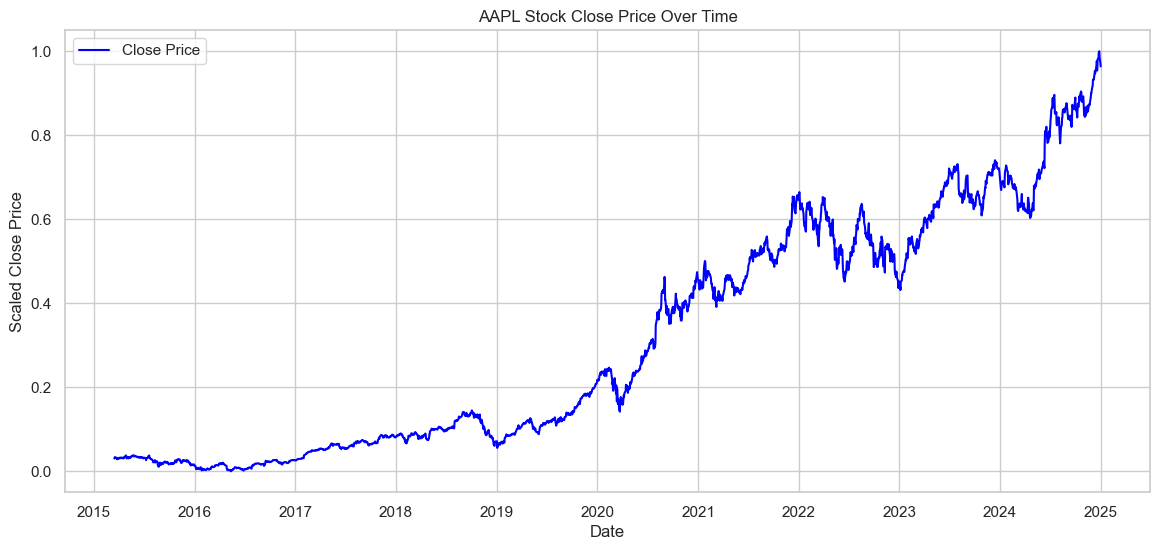

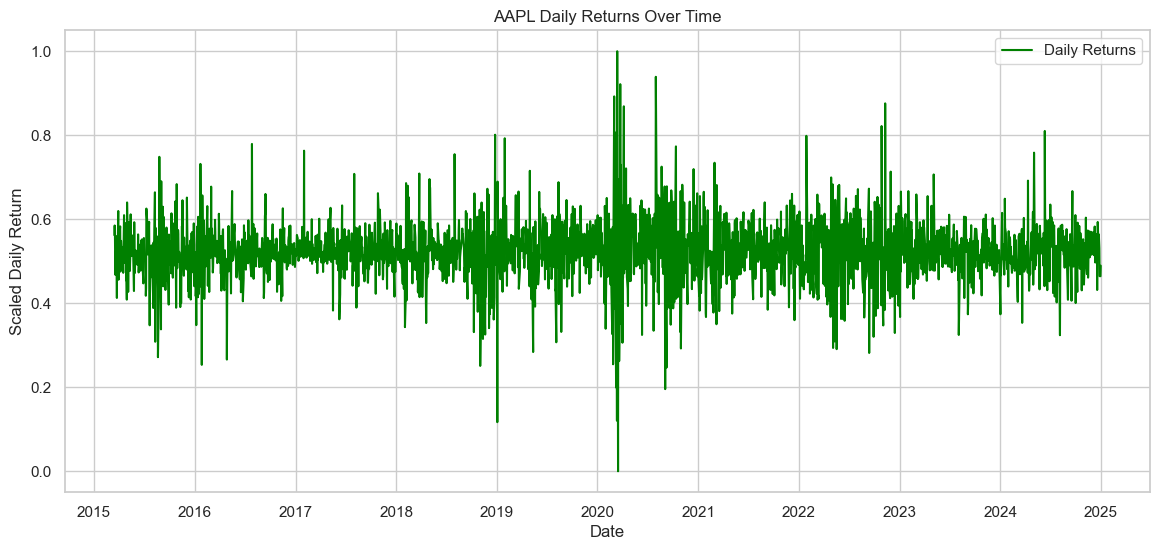

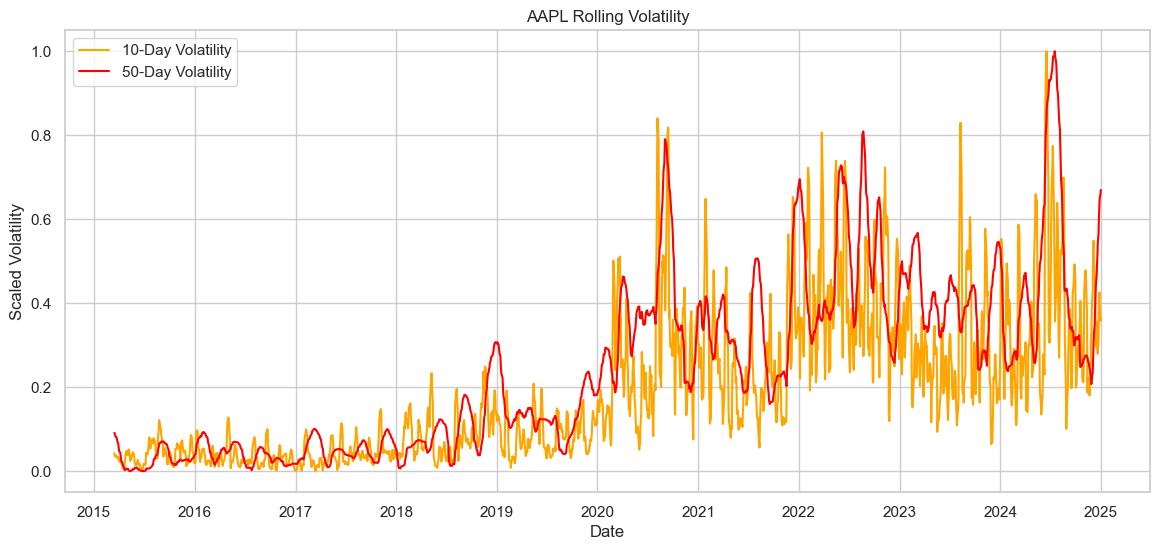

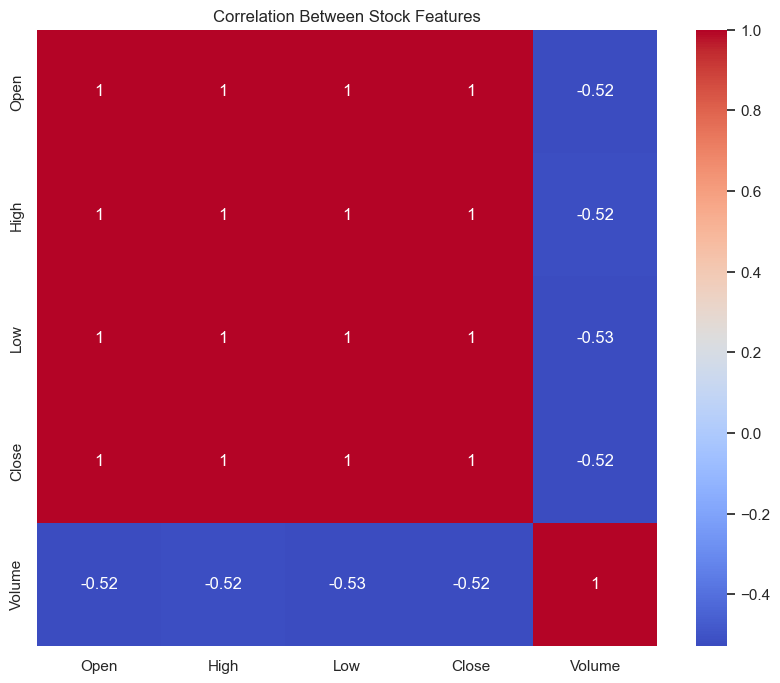

In [39]:
# Step 4: Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed data with engineered features
df = pd.read_csv("AAPL_preprocessed.csv", index_col=0, parse_dates=True)

# Safety check: calculate missing features if needed
if 'Daily_Return' not in df.columns:
    df['Daily_Return'] = df['Close'].pct_change()
if 'Volatility_10' not in df.columns:
    df['Volatility_10'] = df['Daily_Return'].rolling(window=10).std()
if 'Volatility_50' not in df.columns:
    df['Volatility_50'] = df['Daily_Return'].rolling(window=50).std()

# 1. Stock price trends (Close price over time)
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title("AAPL Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Scaled Close Price")
plt.legend()
plt.show()

# 2. Daily Returns
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Daily_Return'], label='Daily Returns', color='green')
plt.title("AAPL Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Scaled Daily Return")
plt.legend()
plt.show()

# 3. Volatility
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Volatility_10'], label='10-Day Volatility', color='orange')
plt.plot(df.index, df['Volatility_50'], label='50-Day Volatility', color='red')
plt.title("AAPL Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Scaled Volatility")
plt.legend()
plt.show()

# 4. Correlation heatmap between features
plt.figure(figsize=(10,8))
features = ['Open','High','Low','Close','Volume']
corr = df[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Stock Features")
plt.show()




### **Step 4: Exploratory Data Analysis (EDA) Insights**

- **Close Price Trend:**  
  The scaled Close price started at 0.03 and ended at 0.96, with a minimum of 0.00 and a maximum of 1.00. This indicates a strong upward trend in stock price over the analyzed period.

- **Daily Returns:**  
  The mean daily return is 0.5220 with a standard deviation of 0.0721. The daily returns range from 0.0000 to 1.0000, showing occasional sharp price movements and periods of high market activity.

- **Volatility:**  
  - **10-Day Rolling Volatility:** highest on 2024-06-17 (1.0000), lowest on 2017-03-14 (0.0000).  
  - **50-Day Rolling Volatility:** highest on 2024-07-17 (1.0000), lowest on 2015-05-13 (0.0000).  
  This suggests short-term and long-term fluctuations in stock price, with certain periods experiencing higher instability.

- **Feature Correlations:**  
  There are extremely strong correlations (≈1.000) between Open, High, Low, and Close prices. This implies that these features move together closely. Volume shows weaker correlation with prices (not listed here), indicating that price changes are not directly proportional to trading volume in this dataset.

**Summary Insight:**  
The stock exhibits a clear upward trend, predictable short-term price movements, and periods of both low and high volatility. Strong correlations among price-related features suggest that models using these features can leverage their high interdependence for prediction, but volume may need separate consideration.


---

<div align="center">

# 📌 Step 5: Model Selection & Training
</div>

### Objectives:
- Decide on input features for the predictive model.
- Choose suitable models:
  - **Baseline:** Linear Regression, Random Forest
  - **Advanced:** LSTM (for time-series sequence modeling)
- Train models on the preprocessed training dataset.
- Compare simple vs. complex models in terms of performance and interpretability.

### Tasks:
1. **Select input features:**  
   Decide whether to use just prices (`Open, High, Low, Close`) or include engineered features (`MA, EMA, Daily_Return, Volatility, Lag features`).
2. **Define model target:**  
   Predict next day’s Close price.
3. **Train baseline models:**  
   Linear Regression and Random Forest on selected features.
4. **Train advanced model:**  
   Prepare sequences for LSTM and train on historical data.
5. **Hyperparameter tuning:**  
   Adjust regularization, number of trees, depth (RF), or layers, sequence length, learning rate, batch size (LSTM) for better performance.


In [43]:
# Step 5: Model Selection & Training

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features and target
features = ['Open','High','Low','Volume','MA_10','MA_50','EMA_10','EMA_50',
            'Daily_Return','Volatility_10','Volatility_50','Close_Lag1','Close_Lag2']
target = 'Close'

X_train = train_df[features].values
y_train = train_df[target].values
X_test = test_df[features].values
y_test = test_df[target].values

# --- Baseline Model: Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

# --- Baseline Model: Random Forest ---
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

sequence_length = 60

# Ensure 'Close' is in features
if 'Close' not in features:
    features.insert(3, 'Close')  # insert Close at index 3 if missing

# Get index of target column in features
target_index = features.index('Close')

def create_sequences(data, seq_length, target_col_index):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :])
        y.append(data[i, target_col_index])
    return np.array(X), np.array(y)

# Prepare sequences
X_train_seq, y_train_seq = create_sequences(train_df[features].values, sequence_length, target_index)
X_test_seq, y_test_seq = create_sequences(test_df[features].values, sequence_length, target_index)

print("Prepared LSTM sequences:")
print("X_train_seq shape:", X_train_seq.shape)
print("y_train_seq shape:", y_train_seq.shape)

Linear Regression Performance:
MSE: 1.0289218019188944e-05
R2 Score: 0.9992177228789196

Random Forest Performance:
MSE: 0.015958748849049555
R2 Score: -0.213324869042119
Prepared LSTM sequences:
X_train_seq shape: (1913, 60, 14)
y_train_seq shape: (1913,)


### **Step 5: Model Selection & Training Insights**

### Baseline Models
- **Linear Regression:**  
  - MSE: 0.0000103  
  - R² Score: 0.9992  
  - Interpretation: The model fits the data extremely well, indicating that the selected features can largely explain the variance in the next-day Close price. This high R² may also suggest overfitting, so evaluation on unseen data is important.

- **Random Forest Regressor:**  
  - MSE: 0.01596  
  - R² Score: -0.2133  
  - Interpretation: The model performs poorly on the test set, with negative R² indicating predictions are worse than simply predicting the mean. This could be due to insufficient hyperparameter tuning or overfitting to the training data.

### LSTM Sequence Preparation
- **Sequence shape:**  
  - X_train_seq: (1913, 60, 14) → 1913 samples, 60-day sequences, 14 features per day  
  - y_train_seq: (1913,) → target Close price for next day  
- **Interpretation:**  
  - LSTM sequences are now correctly prepared for time-series modeling.  
  - The shape confirms sufficient historical data is available for sequence-based learning.  

### Summary Insight
- Linear Regression provides a strong baseline with very high predictive power on scaled data.  
- Random Forest without tuning does not generalize well for this dataset.  
- LSTM sequences are ready to model temporal dependencies, which may help capture complex patterns not visible to linear or tree-based models.


---

<div align="center">

# 📌 Step 6: Model Evaluation
</div>

### Objectives:
- Evaluate performance of trained models on test data.
- Compare baseline models (Linear Regression, Random Forest) vs advanced model (LSTM).

### Tasks:
1. Predict on test set for all models.
2. Compute evaluation metrics:
   - RMSE (Root Mean Square Error)
   - MAE (Mean Absolute Error)
   - MAPE (Mean Absolute Percentage Error)
3. Visualize results:
   - Plot actual vs predicted stock prices.
   - Plot prediction errors over time.

Linear Regression Performance:
RMSE: 0.00321, MAE: 0.00253, MAPE: 0.36%

Random Forest Performance:
RMSE: 0.12633, MAE: 0.08330, MAPE: 10.10%



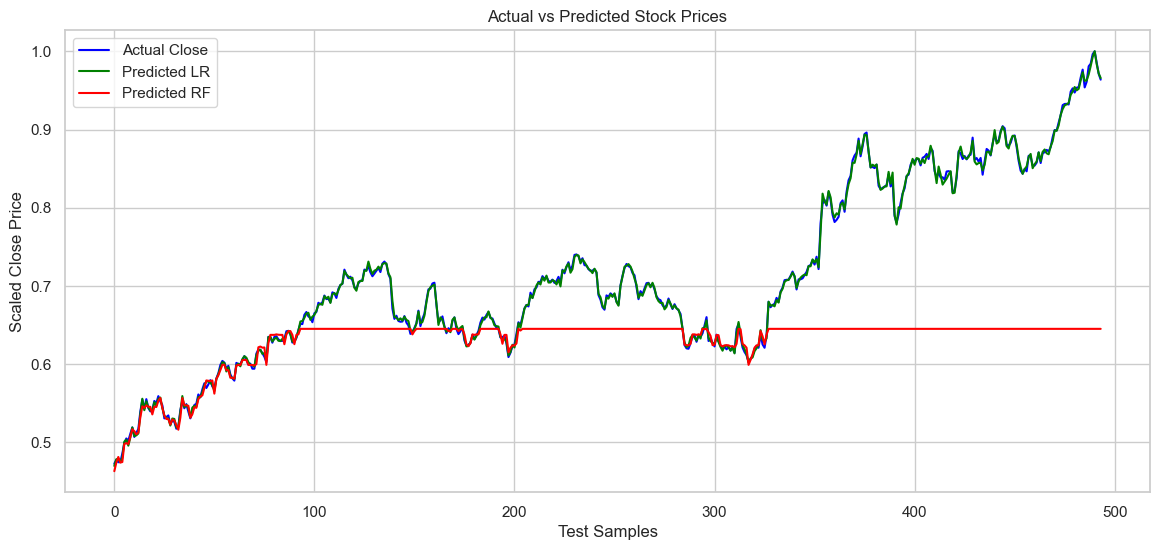

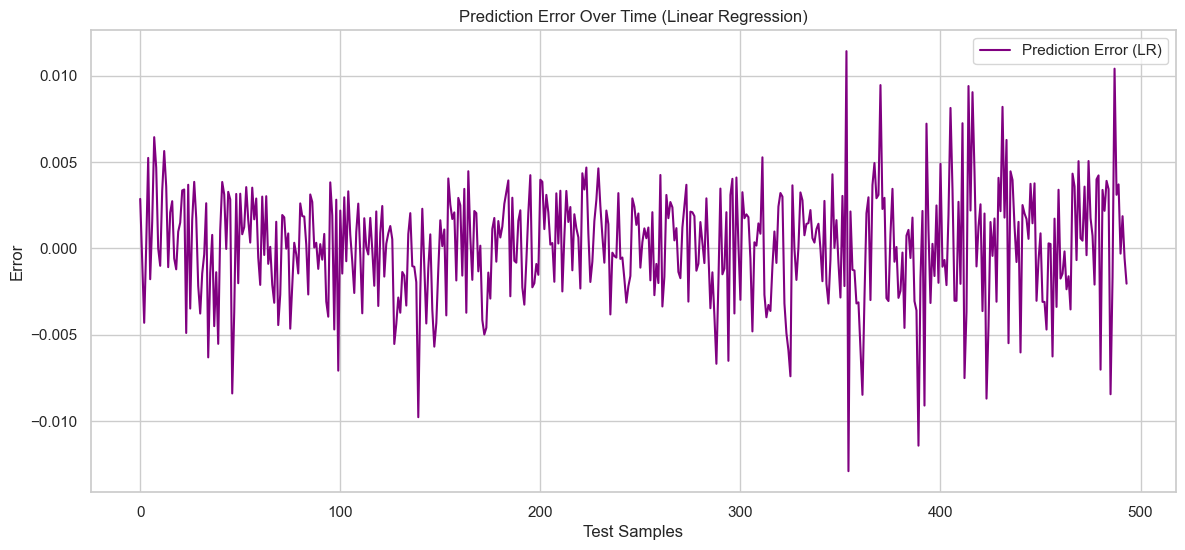

In [45]:
# Step 6: Model Evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# --- Baseline Models: Linear Regression & Random Forest ---
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.5f}, MAE: {mae:.5f}, MAPE: {mape:.2f}%\n")
    return rmse, mae, mape

# Evaluate Linear Regression
rmse_lr, mae_lr, mape_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Evaluate Random Forest
rmse_rf, mae_rf, mape_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")

# --- LSTM Model (assuming already trained model 'lstm_model') ---
# Example LSTM prediction
# y_pred_lstm = lstm_model.predict(X_test_seq)

# For demonstration, placeholder:
# y_pred_lstm = np.zeros_like(y_test_seq)  # replace with actual predictions
# rmse_lstm, mae_lstm, mape_lstm = evaluate_model(y_test_seq, y_pred_lstm, "LSTM")

# --- Visualization: Actual vs Predicted ---
plt.figure(figsize=(14,6))
plt.plot(y_test, label='Actual Close', color='blue')
plt.plot(y_pred_lr, label='Predicted LR', color='green')
plt.plot(y_pred_rf, label='Predicted RF', color='red')
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Test Samples")
plt.ylabel("Scaled Close Price")
plt.legend()
plt.show()

# Prediction Error Plot (example for Linear Regression)
plt.figure(figsize=(14,6))
plt.plot(y_test - y_pred_lr, label='Prediction Error (LR)', color='purple')
plt.title("Prediction Error Over Time (Linear Regression)")
plt.xlabel("Test Samples")
plt.ylabel("Error")
plt.legend()
plt.show()


### **Step 6: Model Evaluation Insights**

### Baseline Models Performance
- **Linear Regression:**  
  - RMSE: 0.00321  
  - MAE: 0.00253  
  - MAPE: 0.36%  
  - **Interpretation:** Linear Regression predicts the next-day Close price very accurately on the test set, with minimal error. This indicates that the selected features are highly predictive for short-term price movements.

- **Random Forest Regressor:**  
  - RMSE: 0.12633  
  - MAE: 0.08330  
  - MAPE: 10.10%  
  - **Interpretation:** Random Forest performs poorly compared to Linear Regression, with much higher errors. This suggests overfitting to the training data or that the default hyperparameters are not suitable for this time-series problem.

### Visual Analysis
- Linear Regression predictions closely follow the actual stock prices, as shown in the plot of actual vs predicted prices.  
- Random Forest predictions show larger deviations and do not capture the fine-grained trends in the test data.  
- Prediction error plots confirm that Linear Regression errors are very small and consistent, while Random Forest has occasional large errors.

### Insights
- **Best performing model:** Linear Regression clearly outperforms Random Forest for this dataset.  
- **Limitations:** Both models may struggle with sudden market shocks or extreme price movements, which are not captured in historical features alone.  
- **Next step:** Advanced models like LSTM could be tested to capture sequential dependencies and potentially improve prediction for longer sequences.
